# Homework 2: SVD and PCA for Machine Learning (Part 1)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
from numpy.linalg import norm

(512, 512)


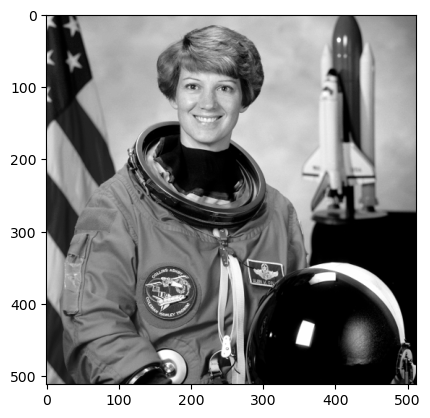

In [52]:
image_data = data.astronaut()

if image_data.ndim == 3:
    image = color.rgb2gray(img_as_float(image_data))
else :
    image = img_as_float(image_data)

print(image.shape)
plt.imshow(image, cmap='grey')

In [53]:
U, singular_values, V_T = np.linalg.svd(image, full_matrices=False)

### Visualizing the dyads and singular values $\sigma_i$ of $X$

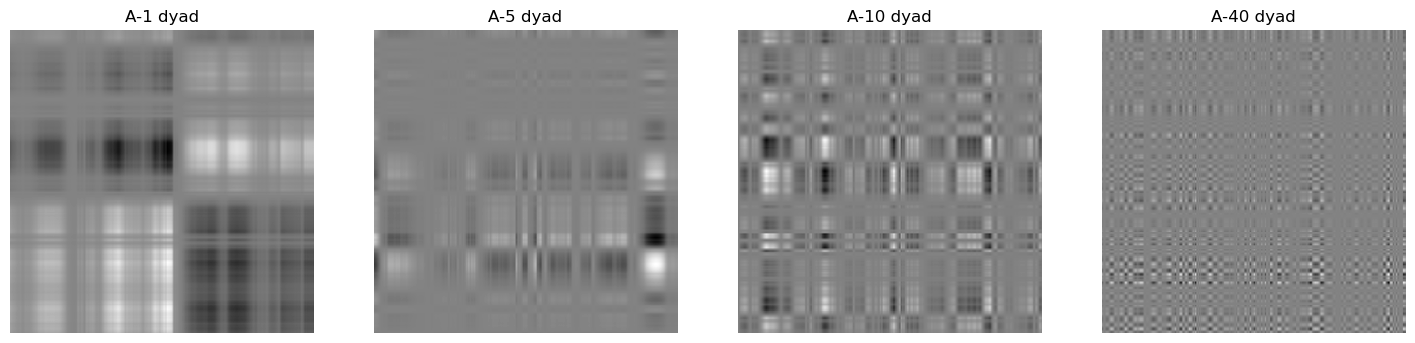

In [54]:
def compute_dyad(i, singular_values, U, V_T):
    return singular_values[i] * np.outer(U[:, i], V_T[i, :])

fig, axes = plt.subplots(1, 4, figsize=(18, 6))
indices = [1, 5, 10, 40]

for ax, i in zip(axes, indices):
    approx_image = compute_dyad(i, singular_values, U, V_T)
    ax.imshow(approx_image, cmap='gray')
    ax.set_title(f"A-{i} dyad")
    ax.axis('off')


As we can see, from $A_1$ to $A_{40}$, the dyads looks increasingly more complex and richer with information.

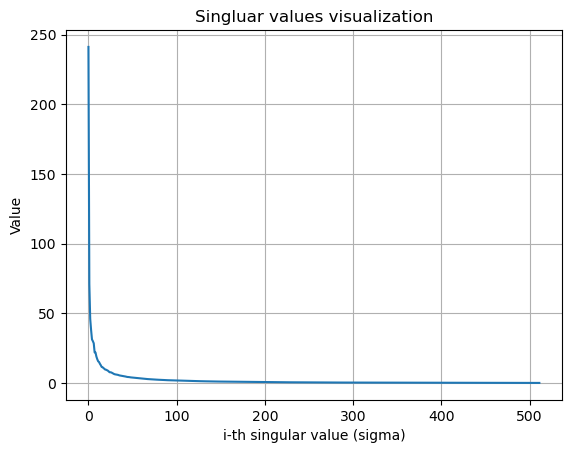

In [55]:

plt.plot(singular_values)
plt.title("Singluar values visualization")
plt.xlabel("i-th singular value (sigma)")
plt.ylabel("Value")
plt.grid(True)
plt.show()

We can notice how the singular values decrease in magnitude, and they progressively get closer to 0.

### $k$-rank approximations

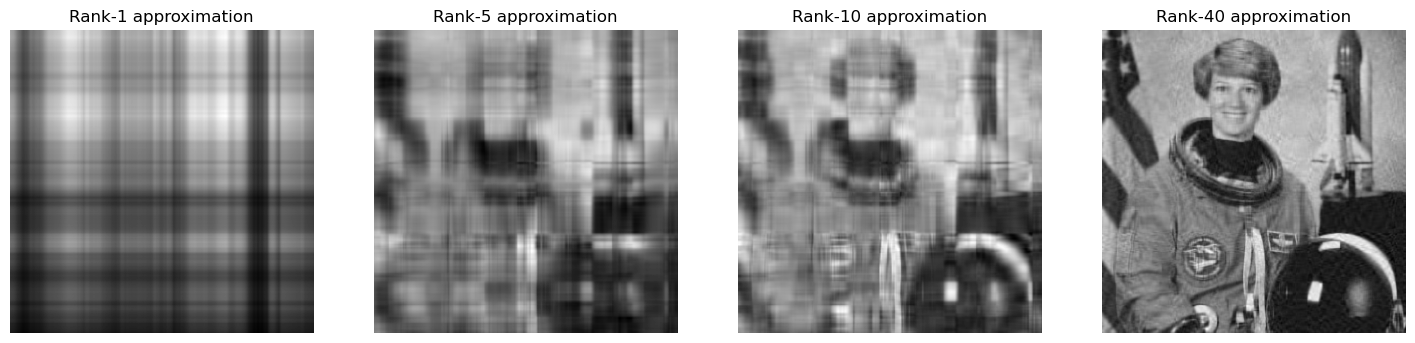

In [56]:
def rank_k_approximation(U, sv, V_T, k):
    return U[:, :k] @ np.diag(sv[:k]) @ V_T[:k, :]

fig, axes = plt.subplots(1, 4, figsize=(18, 6))
ranks = [1, 5, 10, 40]

for ax, rank in zip(axes, ranks):
    approx_image = rank_k_approximation(U, singular_values, V_T, rank)
    ax.imshow(approx_image, cmap='gray')
    ax.set_title(f"Rank-{rank} approximation")
    ax.axis('off')

As the approximation increases in rank, we can see how the image is closer and closer to the original matrix.

### Frobenius-norm error and compression factor $c_k$

Errors: [126.087744669322, 104.11436491779196, 93.41255119868589, 85.3305518519163, 79.40224369022053, 73.52116073485, 67.79062909731911, 64.14103490435245, 60.304374862072436, 57.260050986263835, 54.66372860642481, 52.40956777884605, 50.21782740182901, 48.306982312404365, 46.60872464376324, 45.17965691251745, 43.75377503171988, 42.4329937636553, 41.231678960308315, 40.10274854573799, 38.96815193848689, 37.88863347127121, 36.85330534165634, 35.91788008231553, 35.09158988896921, 34.24900490761302, 33.419163350378746, 32.654177384626585, 31.973213002513056, 31.324079075953524, 30.706737093168048, 30.09557656641806, 29.506329707951465, 28.92443106767162, 28.36329223836101, 27.842587697724188, 27.33315620135049, 26.832962348472797, 26.351778435148564, 25.885268494042883, 25.435775765046078, 24.993363000573073, 24.567417278955112, 24.16453342236173, 23.78159171858158, 23.399975868290475, 23.023105679374304, 22.66298812416588, 22.312136367941598, 21.96774024678867, 21.62251158926009, 21.2865

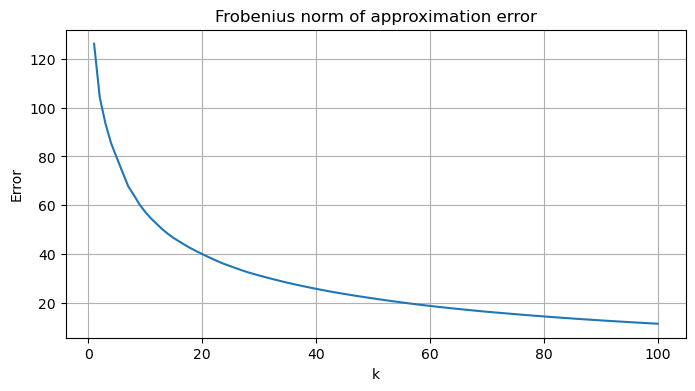

In [57]:
errors = [norm(image - rank_k_approximation(U, singular_values, V_T, k), 'fro') for k in range(1, 101)]
print(f"Errors: {errors}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), errors)
plt.title("Frobenius norm of approximation error")
plt.xlabel("k")
plt.ylabel("Error")
plt.grid(True)
plt.show()

Compression factors: [0.9960899353027344, 0.9921798706054688, 0.9882698059082031, 0.9843597412109375, 0.9804496765136719, 0.9765396118164062, 0.9726295471191406, 0.968719482421875, 0.9648094177246094, 0.9608993530273438, 0.9569892883300781, 0.9530792236328125, 0.9491691589355469, 0.9452590942382812, 0.9413490295410156, 0.93743896484375, 0.9335289001464844, 0.9296188354492188, 0.9257087707519531, 0.9217987060546875, 0.9178886413574219, 0.9139785766601562, 0.9100685119628906, 0.906158447265625, 0.9022483825683594, 0.8983383178710938, 0.8944282531738281, 0.8905181884765625, 0.8866081237792969, 0.8826980590820312, 0.8787879943847656, 0.8748779296875, 0.8709678649902344, 0.8670578002929688, 0.8631477355957031, 0.8592376708984375, 0.8553276062011719, 0.8514175415039062, 0.8475074768066406, 0.843597412109375, 0.8396873474121094, 0.8357772827148438, 0.8318672180175781, 0.8279571533203125, 0.8240470886230469, 0.8201370239257812, 0.8162269592285156, 0.81231689453125, 0.8084068298339844, 0.804496

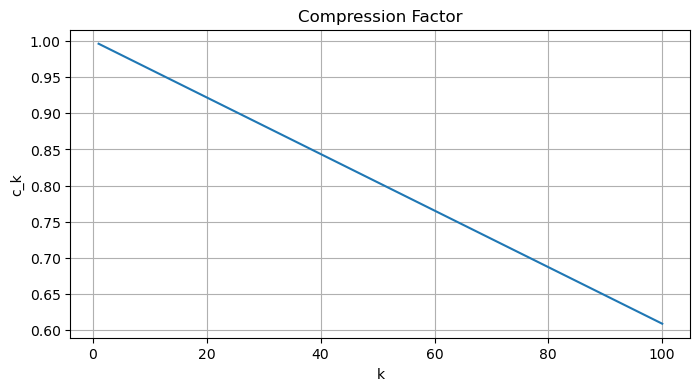

In [58]:
compression_factors = [1 - (k * (image.shape[0] + image.shape[1] + 1)) / (image.shape[0] * image.shape[1]) for k in range(1, 101)]
print(f"Compression factors: {compression_factors}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, 101), compression_factors)
plt.title("Compression Factor")
plt.xlabel("k")
plt.ylabel("c_k")
plt.grid(True)
plt.show()

### Computing $k$ for $c_k = 0$

The value of k for c_k=0 is 256
The approximation error is 2.5760597106598784


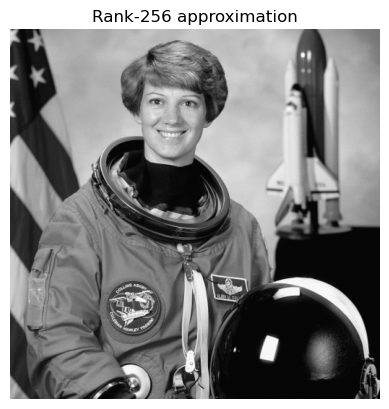

In [59]:
m, n = image.shape
k = round(m * n / (m + n + 1))
print(f"The value of k for c_k=0 is {k}")

A_rank_k = rank_k_approximation(U, singular_values, V_T, k)
error = np.linalg.norm(image - A_rank_k, 'fro')
print(f"The approximation error is {error}")

plt.imshow(A_rank_k, cmap='gray')
plt.title(f"Rank-{k} approximation")
plt.axis('off')
plt.show()


The picture using the $k$ for $c_k=0$ is very close to the original, and its error is very low. In addition, the value is close to being half of the original image dimension. Obviously, the storage benefits are not as significant as lower rank approximations.